In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Import
path_merge = r'/Users/janekobtseva/10-10-2025 Brazilian E-Commerce Public Dataset/02 Data/Prepared Data/merge.pkl'

In [7]:
df= pd.read_pickle(os.path.join(path_merge))

In [9]:
df.shape

(113232, 39)

In [11]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,santa fe do sul,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,para de minas,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,atibaia,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,varzea paulista,SP,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [41]:
#cleaning data
df_clean = df[df['product_weight_g'].isnull() == False]

In [43]:
sub_cor_freigt = df_clean[['product_weight_g','freight_value']]

#I understand that again I took quite obvious data to look at 

In [45]:
sub_cor_freigt.isnull().sum()

product_weight_g    0
freight_value       0
dtype: int64

In [47]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [51]:
score = [kmeans[i].fit(sub_cor_freigt).score(sub_cor_freigt) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1605303242868.7644,
 -481408104336.9395,
 -215018968088.2274,
 -136905450580.96808,
 -87796319288.04483,
 -56146538640.901764,
 -45173698957.094696,
 -31767656391.04338,
 -24373576441.969986]

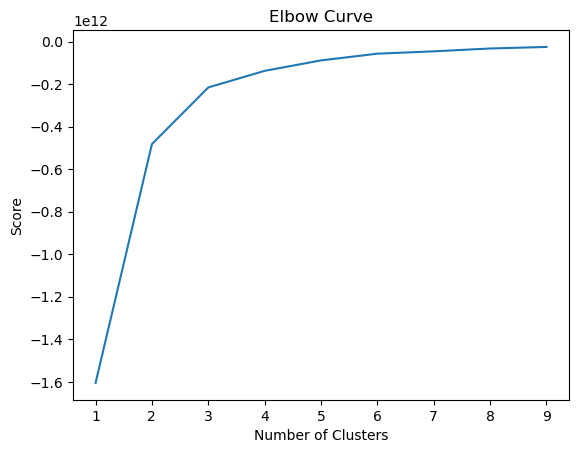

In [53]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [69]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 7) 

#I chose 7 clusters, as looking at the graph abovem after 7 there is a stagnation of the line

In [71]:
# Fit the k-means object to the data.

kmeans.fit(sub_cor_freigt)

KMeans(n_clusters=7)

In [73]:
sub_cor_freigt['clusters'] = kmeans.fit_predict(sub_cor_freigt)

/var/folders/13/1jb5kb0d14783hy2x_n_wdrm0000gn/T/ipykernel_28450/356752334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cor_freigt['clusters'] = kmeans.fit_predict(sub_cor_freigt)


In [75]:
sub_cor_freigt.head()

,product_weight_g,freight_value,clusters
0,650.0,13.29,1
1,30000.0,19.93,4
2,3050.0,17.87,6
3,200.0,12.79,1
4,3750.0,18.14,6


In [77]:
sub_cor_freigt['clusters'].value_counts()

clusters
1    70674
3    23684
6     6270
2     6132
5     3792
0     1960
4      719
Name: count, dtype: int64

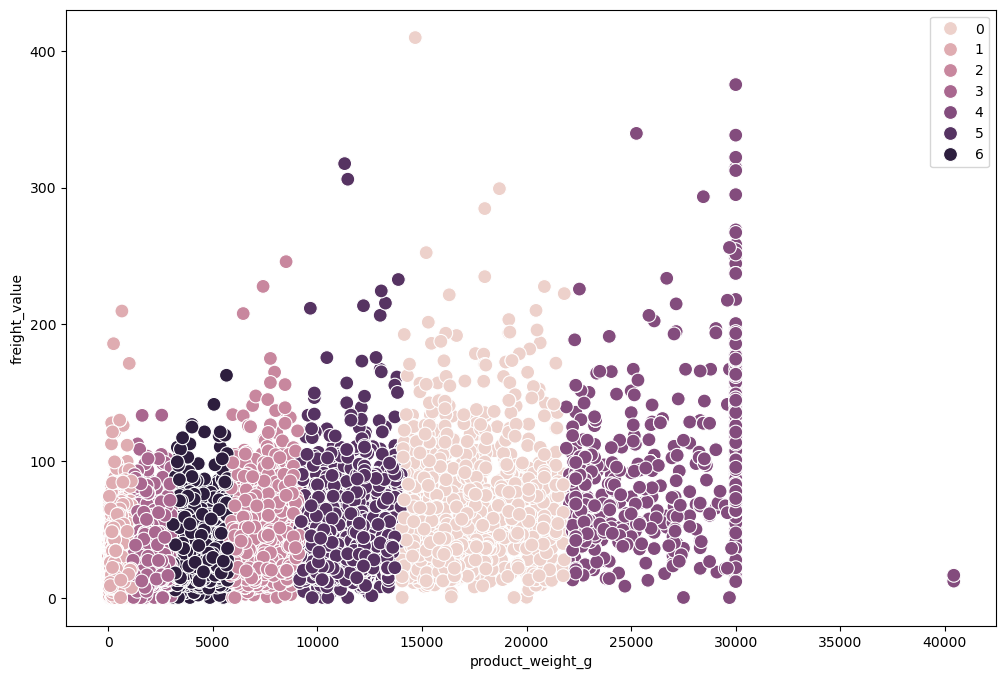

In [79]:
# Plot the clusters for the "department_id" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_cor_freigt['product_weight_g'], y=sub_cor_freigt['freight_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('product_weight_g') # Label x-axis.
plt.ylabel('freight_value') # Label y-axis.
plt.show()

In [85]:
sns.lmplot(x = 'freight_value', y = 'product_weight_g', data = sub_cor_freigt)

In [87]:
sub_cor_freigt.groupby('clusters').agg({'freight_value':['mean', 'median', 'min', 'max'], 
                         'product_weight_g':['mean', 'median', 'min', 'max']})

freight_value                       product_weight_g           \
                  mean  median   min     max             mean   median   
clusters                                                                 
0            57.044071  47.285  0.08  409.68     16933.818878  16400.0   
1            15.894878  15.100  0.00  209.63       434.684622    350.0   
2            31.103126  24.860  0.00  245.75      7184.488258   7000.0   
3            19.709278  17.740  0.00  133.48      1796.459889   1650.0   
4            94.737580  82.400  0.00  375.28     26812.550765  27150.0   
5            39.204059  31.760  0.00  317.47     11083.051424  10750.0   
6            24.786604  21.080  0.05  162.64      4257.981340   4150.0   

                            
              min      max  
clusters                    
0         14033.0  21800.0  
1             0.0   1113.0  
2          5750.0   9133.0  
3          1117.0   3025.0  
4         21900.0  40425.0  
5          9150.0  14000.0  
6          3042.0   5700.0

In [ ]:
#Well, maybe the only useful way to use the graph would be - 
#looking at the graph we see more outliesrs when product has the higher price at the same time the higher weight